<a href="https://colab.research.google.com/github/Codinggenttleman/202010/blob/main/drink2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   #데이터 분석
import numpy as np    #데이터 계산
import matplotlib.pyplot as plt  # 그림 그리기


In [ ]:
drinks = pd.read_csv('drinks.csv')  # 데이터를 Dataframe 형으로 읽어온다.

In [ ]:
#################################################################
# step 1 탐색
#################################################################

In [ ]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [ ]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
#################################################################
# step 2 인사이트의 발견 (대략의 시각화 -> 통찰력을 높일 수 있다)
#################################################################

In [ ]:
# 단순 상관 분석 방법 : 피처(변수개념)가 2개일때 상관 계수 계산
# 다중 상관 분석 방법 : 피처(변수개념)가 여러개일때 상호 연관성 분석



In [ ]:
# 맥주와 와인 소비량의 상관관계 -> 단순 상관 분석
corr = drinks[['beer_servings','wine_servings']].corr(method = 'pearson')
# 상관계수를 구하는 계산 방법 중 하나이다. 가장 널리 쓰이는 방법이다. 
print(corr)

# 상관 계수 0.52

# -1에 가까운 값이 얻어지면 : 누가 봐도 매우 강력한 음(-)의 상관. 오히려 너무 확고하기 때문에 사회과학 데이터일 경우 데이터를 조작한 게 아닌가 의심할 정도이다. 물론 이건 사회과학 얘기고 순수학문에 가까운 분야일수록 요구되는 상관관계는 높은 편.
# -0.5 정도의 값이 얻어지면 : 강력한 음(-)의 상관. 연구자는 변인 x 가 증가하면 변인 y 가 감소한다고 자신 있게 말할 수 있다.
# -0.2 정도의 값이 얻어지면 : 음(-)의 상관이긴 한데 너무 약해서 모호하다. 상관관계가 없다고는 할 수 없지만 좀 더 의심해 봐야 한다.
# 0 정도의 값이 얻어지면 : 대부분의 경우, 상관관계가 있을거라고 간주되지 않는다. 다른 후속 연구들을 통해 뒤집어질지는 모르지만 일단은 회의적이다. 하지만 무조건적으로 그런건 아니라 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.
# 0.2 정도의 값이 얻어지면 : 너무 약해서 의심스러운 양(+)의 상관. 이것만으로는 상관관계에 대해 아주 장담할 수는 없다. 하지만 사회과학에선 매우 큰 상관관계가 있는 것으로 간주한다.
# 0.5 정도의 값이 얻어지면 : 강력한 양(+)의 상관. 변인 x 가 증가하면 변인 y 가 증가한다는 주장은 이제 통계적으로 지지받고 있다.
# 1에 가까운 값이 얻어지면 : 이상할 정도로 강력한 양(+)의 상관. 위와 마찬가지로, 이렇게까지 확고한 상관관계는 오히려 쉽게 찾아보기 어렵다.

# 나무위키 상관 계수
# https://namu.wiki/w/%EC%83%81%EA%B4%80%20%EA%B3%84%EC%88%98


# 많은 수의 상관 계수가 있지만 가장 널리 쓰이는 것은 피어슨 상관 계수다. 심지어 스피어만 상관 계수나 파이, r(b)같은 다른 상관계수들도 피어슨 상관계수의 변형이니 말 다했다.[3]이 상관계수는 측정하려는 두 변수의 상관관계가 서로 선형일때, 즉 1차함수로 표현가능할때 유용하다. 그래서 상관관계가 어떤 모양을 그리는지가 중요하다. 만약 상관관계가 직선이 아닌 곡선을 그린다면 η같은 다른 상관계수를 써야 한다.
# 피어슨 상관계수는 수학적으로 말하면 '전체 편차' 내에서 '예측치와 평균 간의 차이'가 차지하는 비율이라고 할 수 있다. 좀 더 풀어서 설명해보자면 통계에서 편차는 다음처럼 두 부분으로 나눌수 있다.



               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
# 다중 상관 분석

cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


In [ ]:
import seaborn as sns

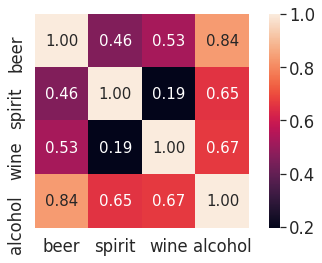

In [ ]:
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols_view,
                 xticklabels=cols_view)

plt.tight_layout()
plt.show()

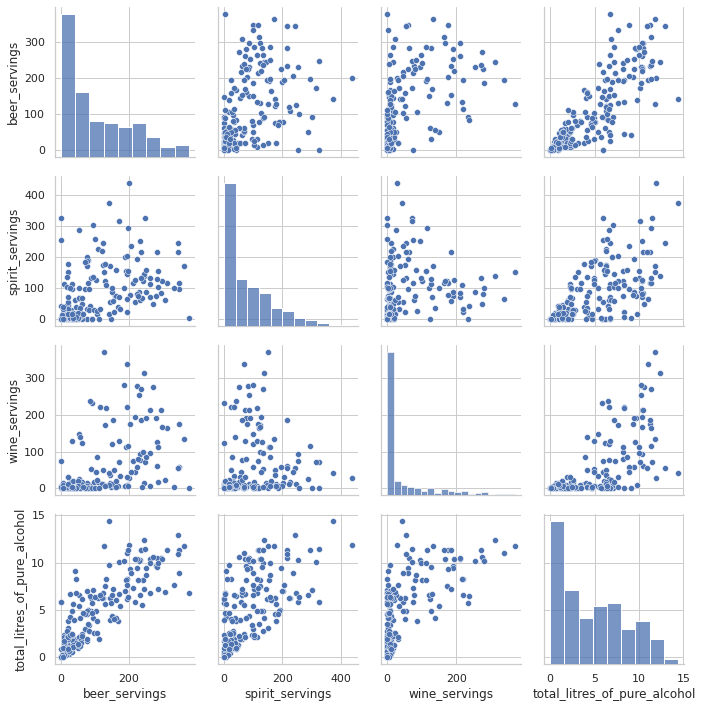

In [ ]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

# alcohol 피처가 대체적으로 모든 단른 피처들과의 상관 관계가 있는것으로 보인다.
# 특히 beer와의 상관성이 매우 높은 것으로 나타난다. 


In [ ]:
#################################################################
# step 3 탐색적 분석 : 개념적 탐색 분석
#################################################################

# [ 데이터 전처리 ]

print(drinks.isnull())

     country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0      False          False  ...                         False      False
1      False          False  ...                         False      False
2      False          False  ...                         False      False
3      False          False  ...                         False      False
4      False          False  ...                         False      False
..       ...            ...  ...                           ...        ...
188    False          False  ...                         False      False
189    False          False  ...                         False      False
190    False          False  ...                         False      False
191    False          False  ...                         False      False
192    False          False  ...                         False      False

[193 rows x 6 columns]


In [ ]:
print(drinks.isnull().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [ ]:
print(drinks.dtypes)

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
drinks['continent'] = drinks['continent'].fillna('OT')

# 결측 데이터 처리

In [ ]:
drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


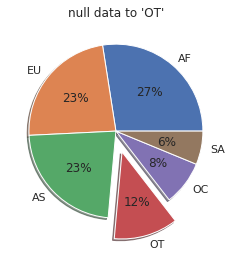

In [ ]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [ ]:
# [그룹단위 데이터 분석 : 대륙별로 분석]
# apply(), agg()

result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
# 전체 평균보다 많은 알콜 섭취 대륙 구하기

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)


continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer 가장 높은 대륙?

beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


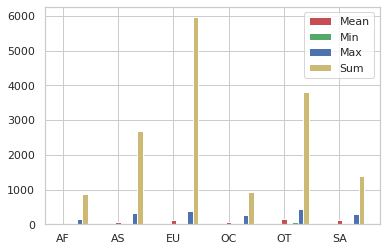

In [ ]:
# 대륙 별 spirit 의 평균, 최소, 최대, 합계 시각화
 


n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()


index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                 color = 'r',
                 label = 'Mean')

rects2 = plt.bar(index + bar_width * 2, mins, bar_width,
                 color = 'g',
                 label = 'Min')

rects3 = plt.bar(index + bar_width * 3, maxs, bar_width,
                 color = 'b',
                 label = 'Max')

rects4 = plt.bar(index + bar_width * 4, sums, bar_width,
                 color = 'y',
                 label = 'Sum')


plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()


In [ ]:
#################################################################
# step 4 통계적 분석 
#################################################################



In [ ]:
from scipy import stats


In [ ]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정

africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

print(tTestResult)


# t-test 두 집단 간 평균의 차이에 대한 검정, 모집단의 평균 등 실제 정보를 모를 때 현재의 
# 데이터만으로 두 집단의 차이에 대해 검정, 조건 : t-test는 검정 대상인 두 집단의 
#데이터의 개수가 비슷하면서 두 데이터의 정규 분포를 보이는 경우에 신뢰도가 높다. 

# pvalue : 가설이 얼마나 믿을 만한 것인지를 나타내는 지표, 0.05 (or 0.01 ) 유의 확률
#          0.05보다 작으면 통계적으로 유의미 하다. 

# [결론] 아프리카와 유럽 대륙 간의 맥주 소비량의 차이는 통계적으로 유의미하다

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)


In [ ]:
# 대한민국은 얼마나 독한 술을 마시는 나라일까???
# 알콜 비율 피처 생성 => total 피처를 모든 술의 총 소비량으로 나누자 

# 알콜 비율 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']



In [ ]:
# 순위 정보 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(15)


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


Text(24, 0.1093939393939394, 'South Korea : 15')

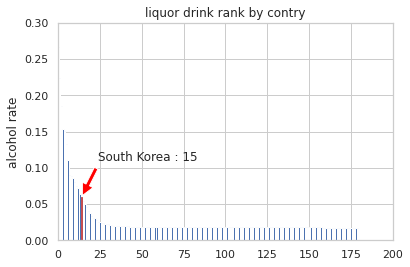

In [ ]:
# 국가별 순위 정보를 그래프로 시각화

country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))